In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import cluster
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

In [5]:
df = pd.read_csv('data/prepared_data/by_position/kmeans/CB.csv')
# df.drop('Unnamed: 0', axis=1, inplace=True)

players_names = pd.read_csv('data/prepared_data/by_position/kmeans/CB_names.csv')

df.head(2)

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,DefensiveAwareness
0,1.708723,3.295795,2.673264,-0.513561,0.205626,5.248277,0.296805,3.706619,-0.594588,0.281727,...,-1.225712e-14,2.881456,3.480874,0.14223,-0.805047,-0.387682,-1.130427,0.161935,-0.318981,2.199150e+00
1,0.158425,1.856732,1.256691,-0.556007,-0.377289,1.488727,0.296805,3.706619,-0.380280,0.454883,...,3.678905e+00,1.938897,1.943175,0.46219,1.755405,-0.857288,0.449541,-1.424985,-0.397011,-2.090310e-15


In [6]:
k_means = cluster.KMeans(n_clusters=2, max_iter=50, init='random',n_init=25, random_state=123)
k_means.fit(df)

KMeans(init='random', max_iter=50, n_clusters=2, n_init=25, random_state=123)

In [7]:
k_means.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [8]:
labels = k_means.labels_
df['cluster'] = labels
df

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,DefensiveAwareness,cluster
0,1.708723,3.295795,2.673264,-0.513561,0.205626,5.248277,0.296805,3.706619,-0.594588,0.281727,...,2.881456,3.480874,0.142230,-0.805047,-0.387682,-1.130427,0.161935,-3.189815e-01,2.199150e+00,0
1,0.158425,1.856732,1.256691,-0.556007,-0.377289,1.488727,0.296805,3.706619,-0.380280,0.454883,...,1.938897,1.943175,0.462190,1.755405,-0.857288,0.449541,-1.424985,-3.970110e-01,-2.090310e-15,0
2,0.822838,0.777435,0.194262,-0.588196,-0.325704,-0.391048,0.296805,3.706619,-1.880437,-0.410899,...,0.367965,0.405475,-0.497689,0.795235,-0.857288,1.081529,0.161935,-4.815429e-01,2.869473e-01,0
3,0.158425,1.137201,0.548405,-0.573693,-0.191582,1.488727,0.296805,3.706619,-1.023204,-0.584055,...,0.996338,1.020555,1.102109,0.795235,0.786333,1.081529,0.161935,-4.510626e-01,7.282248e-01,0
4,0.379896,3.475678,2.850336,-0.294256,0.798859,5.248277,0.296805,-0.245185,1.334186,2.013290,...,3.352735,2.712024,0.782149,-0.164934,0.551530,0.133548,0.161935,1.471635e-01,3.375890e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,0.601367,-1.201276,-1.753526,0.816418,-0.366972,-0.391048,-1.383455,-0.245185,1.334186,-0.757211,...,-1.045874,-0.978454,-1.457568,-0.164934,0.081924,1.081529,-1.424985,2.345401e+00,-8.897927e-01,1
1366,-2.056287,-2.820222,0.548405,0.551130,2.707522,-0.391048,0.296805,-0.245185,2.405726,-0.064586,...,-2.616805,-2.054844,-1.457568,-0.484991,0.551530,-1.130427,1.114088,2.735548e+00,-2.213625e+00,1
1367,-2.056287,-2.280573,-0.336953,0.639559,2.191667,-0.391048,0.296805,-0.245185,-0.380280,-0.930368,...,-1.202967,-1.285994,-0.177729,-0.164934,-0.622485,-0.182446,0.161935,2.451066e+00,-1.625255e+00,1
1368,-1.834816,-3.000105,-0.159881,0.215098,2.191667,-0.391048,0.296805,-0.245185,0.691261,0.628039,...,-2.459712,-2.362383,-1.137608,1.115292,-1.326895,-1.446421,1.431472,1.252175e+00,-2.507810e+00,1


In [9]:
numClusters = np.arange(1,7,1)
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k, max_iter=50,init='random', n_init=25, random_state=123)
    k_means.fit(df)
    SSE.append(k_means.inertia_)

SSE

[63360.52627737228,
 51971.18358788313,
 48600.96079897225,
 45579.71558544428,
 43601.585026830864,
 42240.931856868876]

Text(0, 0.5, 'SSE')

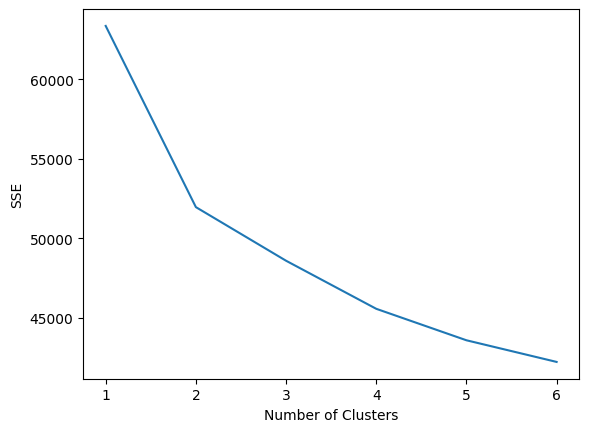

In [10]:
plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [11]:
numClusters = np.arange(2,6,1)
SC = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k, max_iter=50,init='random', n_init=25, random_state=123)
    k_means.fit(df)
    SC.append(silhouette_score(df, k_means.labels_))
SC

[0.15879368995961948,
 0.1215531016607612,
 0.09823089975225906,
 0.08722924946331925]

Text(0, 0.5, 'SC')

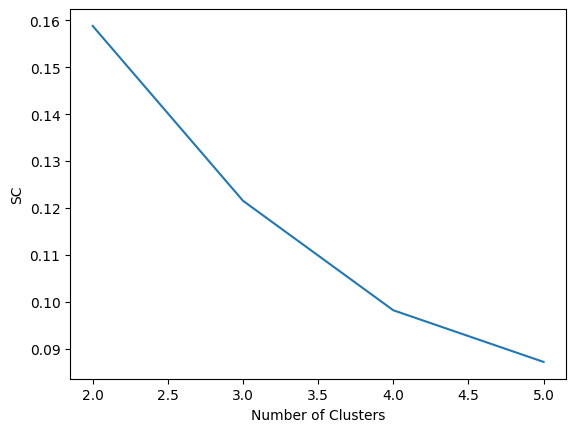

In [12]:
plt.plot(numClusters, SC)
plt.xlabel('Number of Clusters')
plt.ylabel('SC')

c:\Users\doLu175\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


ValueError: X has 47 features, but PCA is expecting 46 features as input.

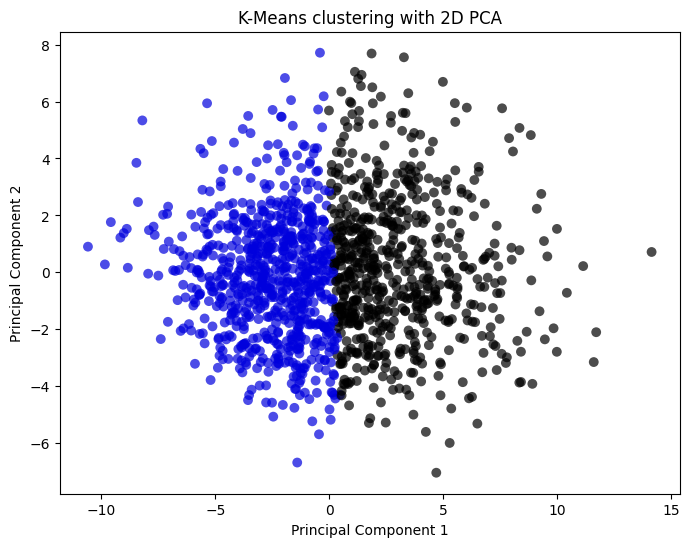

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop('cluster', axis=1, errors='ignore'))  

df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = labels  

colors = plt.cm.nipy_spectral(df_pca['cluster'].astype(float) / k_means.n_clusters)
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], s=50, lw=0, alpha=0.7, c=colors, edgecolor='k')
plt.title('K-Means clustering with 2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

centroids = pca.transform(k_means.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', 
            s=100, linewidths=3, color='r', zorder=10)

plt.show()

# Experimentation
## Trying the Grid-Search

In [44]:
from sklearn.model_selection import GridSearchCV  
from sklearn.cluster import KMeans  
    
param_grid = {  
    'n_clusters': [2, 3, 4, 5, 6],   
    'max_iter': [50, 100, 150, 200],   
    'n_init': [10, 15, 20, 25, 30]  
}  
  
k_means = KMeans(init='random', random_state=123)  
  
grid_search = GridSearchCV(k_means, param_grid, cv=5)  
  
grid_search.fit(df)  
print(grid_search.best_params_)  


{'max_iter': 100, 'n_clusters': 6, 'n_init': 10}


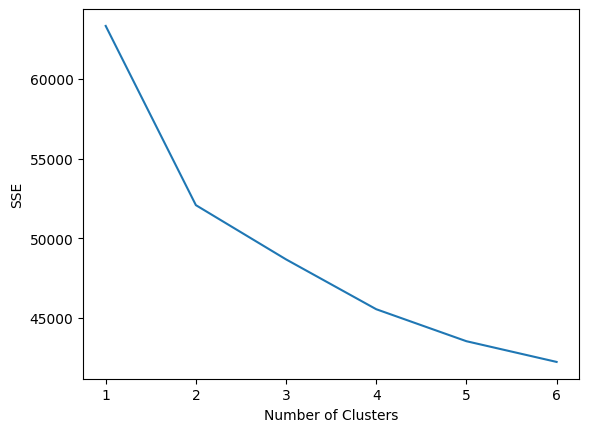

In [45]:
# Best parameters obtained from GridSearchCV  
best_params = {'max_iter': 100, 'n_clusters': 6, 'n_init': 10}  
  
numClusters = np.arange(1, 7, 1)  
SSE = []  
for k in numClusters:  
    k_means = cluster.KMeans(n_clusters=k, max_iter=best_params['max_iter'], init='random', n_init=best_params['n_init'], random_state=123)  
    k_means.fit(df)  
    SSE.append(k_means.inertia_)  
  
plt.plot(numClusters, SSE)  
plt.xlabel('Number of Clusters')  
plt.ylabel('SSE')  
plt.show()  


# DBSCAN

In [47]:
from sklearn.cluster import DBSCAN

In [50]:
df = pd.read_csv(r'C:\Users\Luciano Beylouni\Documents\t1-nao-supervisionado\data\prepared_data\by_position\kmeans\CM.csv')

In [63]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=5, min_samples=3)  # choose appropriate values for epsilon (eps) and min_samples

# Fit the DBSCAN model
dbscan.fit(df)

# Retrieve the labels (assigned to each data point)
labels = dbscan.labels_

# Add the cluster labels to the original dataframe
df['cluster'] = labels

# Display the first few entries with the clusters
print(df.head())

# Optionally, you can count the number of points in each cluster
print("Number of points per cluster:")
print(np.bincount(labels + 1))  # '+ 1' is used because DBSCAN labels the noise points as '-1'

        Age   Overall  Potential     Value      Wage  \
0  0.783640  3.698892   2.976074 -0.119315  1.624201   
1  1.242460  2.292568   1.619067 -0.453980 -0.021359   
2  1.930689  2.995730   2.297570 -0.441904  0.713164   
3 -0.363408  2.292568   2.297570 -0.379802 -0.101075   
4 -0.592818  2.468359   2.636822 -0.333225  0.314586   

   International Reputation  Weak Foot  Skill Moves    Height    Weight  ...  \
0                  5.360709   2.834307     1.941430  0.337150 -0.545043  ...   
1                  3.448216   1.286051     1.941430  0.680632  1.175937  ...   
2                  5.360709   1.286051     1.941430 -1.208517 -1.233435  ...   
3                 -0.376770  -0.262205     0.353154  1.711076  1.692231  ...   
4                  3.448216  -0.262205     0.353154 -1.208517 -0.889239  ...   

   StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
0        0.126022      -0.630085  1.394982    0.776339  -1.179914   
1        1.457691       1.435464  1.712123  

In [62]:
# Try running DBSCAN with different values of 'eps' and 'min_samples'
eps_values = [5, 100, 500, 750]  # Example eps values, adjust based on your data
min_samples_values = [3, 5, 10]  # Example min_samples values

# Find the best parameters
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df)
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        print(f'eps: {eps}, min_samples: {min_samples}')
        print(f'Estimated number of clusters: {n_clusters_}')
        print(f'Estimated number of noise points: {n_noise_}')
        print("")

eps: 5, min_samples: 3
Estimated number of clusters: 5
Estimated number of noise points: 272

eps: 5, min_samples: 5
Estimated number of clusters: 1
Estimated number of noise points: 313

eps: 5, min_samples: 10
Estimated number of clusters: 1
Estimated number of noise points: 345

eps: 100, min_samples: 3
Estimated number of clusters: 1
Estimated number of noise points: 0

eps: 100, min_samples: 5
Estimated number of clusters: 1
Estimated number of noise points: 0

eps: 100, min_samples: 10
Estimated number of clusters: 1
Estimated number of noise points: 0

eps: 500, min_samples: 3
Estimated number of clusters: 1
Estimated number of noise points: 0

eps: 500, min_samples: 5
Estimated number of clusters: 1
Estimated number of noise points: 0

eps: 500, min_samples: 10
Estimated number of clusters: 1
Estimated number of noise points: 0

eps: 750, min_samples: 3
Estimated number of clusters: 1
Estimated number of noise points: 0

eps: 750, min_samples: 5
Estimated number of clusters: 1


In [64]:
df['cluster'].unique()

array([-1,  0,  1,  2,  3,  4], dtype=int64)

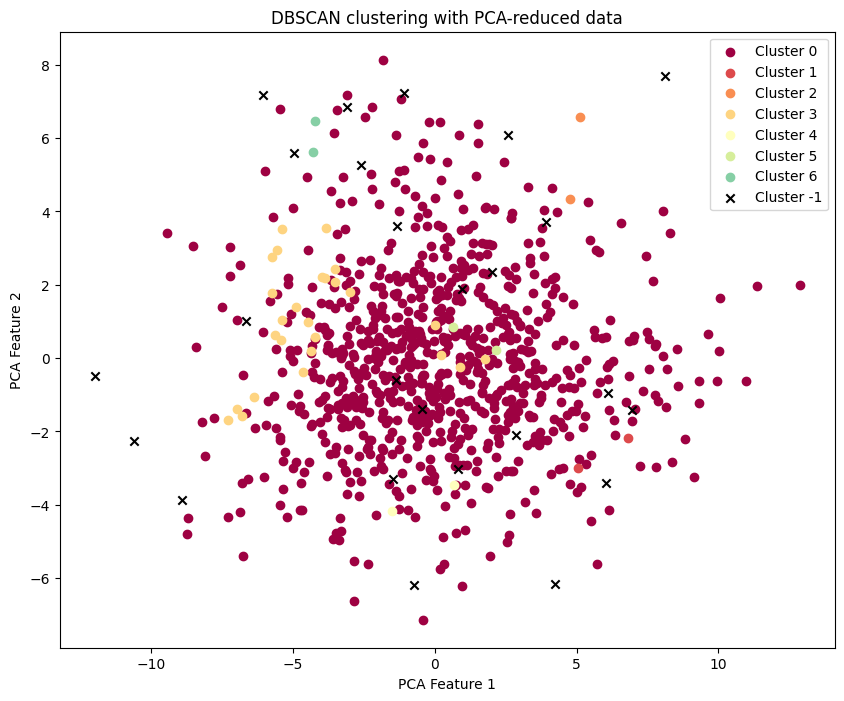

In [70]:
# Apply DBSCAN clustering
# (Use your optimal eps and min_samples found before, 0.5 and 5 are just placeholder values)
dbscan = DBSCAN(eps=7, min_samples=2)
df['cluster'] = dbscan.fit_predict(df)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop('cluster', axis=1))

# Plot the PCA-transformed version of your data
plt.figure(figsize=(10, 8))
unique_labels = set(df['cluster'])

for label in unique_labels:
    # Select rows for each cluster (label)
    cluster_data = df_pca[df['cluster'] == label]
    
    # Give noise points a special marker (label -1)
    if label == -1:
        marker = 'x'  # Noise
        color = 'black'
    else:
        marker = 'o'  # Cluster member
        color = plt.cm.Spectral(float(label) / len(unique_labels))

    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=[color], marker=marker, label=f'Cluster {label}')

plt.title('DBSCAN clustering with PCA-reduced data')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()